In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import style
%matplotlib inline 

import pymysql

In [2]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='1a_2b_3c_4d$',db='ps4')

# At first, Let's analyze the Data using "SQL Analysis Tools"

*As we can see, the data is about video games. So, we shall start by figuring out the best PS4 of all times considering:

"Genre, Year, Publisher, Sales Locally & Globally"

In [3]:
#/*-------------------Using Rank() Function-------------------*/

Rank = pd.read_sql_query("""select 
  Genre, 
  Year, 
  Publisher, 
  GLOBAL, 
  rank() over(
    order by 
      `North America` DESC
  ) AS `North America Rank `, 
  rank() over(
    order by 
      Europe DESC
  ) AS `Europe Rank `, 
  rank() over(
    order by 
      Japan DESC
  ) AS `Japan Rank `, 
  rank() over(
    order by 
      `Rest of World` DESC
  ) AS `Rest of World Rank `, 
  rank() over(
    order by 
      Global DESC
  ) AS `Rank Globally` 
from 
  ps4""",conn)

Rank.head(10)

,Genre,Year,Publisher,GLOBAL,North America Rank,Europe Rank,Japan Rank,Rest of World Rank,Rank Globally
0,Action,2014,Rockstar Games,19390000,2,1,4,1,1
1,Shooter,2015,Activision,15090000,1,6,10,2,2
2,Action-Adventure,2018,Rockstar Games,13940000,3,4,30,3,3
3,Shooter,2017,Activision,13400000,4,4,12,4,4
4,Sports,2017,EA Sports,11800000,36,2,51,5,5
5,Sports,2016,Electronic Arts,10940000,37,3,64,7,6
6,Action,2016,Sony Interactive Entertainment,10330000,5,10,30,6,7
7,Action-Adventure,2018,Sony Interactive Entertainment,8760000,6,13,17,8,8
8,Shooter,2016,Activision,8480000,8,11,35,9,9
9,Role-Playing,2015,Bethesda Softworks,8480000,9,9,23,10,9


**It's clear after analyzing through using Rank() function**

1- That Year :2014 earned the first rank both global, in Europe, and also in the rest of the world.

2- It's also clear that the year following it: 2015, North America been ranked first among all, and is considered also to come    in the second place Globally.

3- Another finding is that: PS4 has been becoming popular specially Globally, followed by the rest of the world, then in North    America, ending with Japan over the past years.

4- The most popular genres to invest in are: "Action, shooter, Action-Adventure, Sports" consequitively.

5- Best Performing Publishers are: "Rockstar Games, Activision, EA sports" consequitively.

In [4]:
#/*------------------------Evaluating Percent Profit of each Region Per Year--------------------*/


Percent_Rank = pd.read_sql_query("""select 
  year, 
  concat(
    round(
      100 * sum(global) over(partition by year)/ sum(global), 
      1
    ), 
    ' %'
  ) as `Global %`, 
  concat(
    round(
      100 * sum(`North America`) over(partition by year)/ sum(`North America`), 
      1
    ), 
    ' %'
  ) as `North America %`, 
  concat(
    round(
      100 * sum(Japan) over(partition by year)/ sum(Japan), 
      1
    ), 
    ' %'
  ) as `Japan %`, 
  concat(
    round(
      100 * sum(Europe) over(partition by year)/ sum(Europe), 
      1
    ), 
    ' %'
  ) as `Europe %`, 
  concat(
    round(
      100 * sum(`Rest of World`) over(partition by year)/ sum(`Rest of World`), 
      0
    ), 
    ' %'
  ) as `Rest of World %` 
from 
  ps4 
group by 
  year
""",conn)
Percent_Rank.head()

,year,Global %,North America %,Japan %,Europe %,Rest of World %
0,2013,16.5 %,21.1 %,5.2 %,13.8 %,17 %
1,2014,19.0 %,18.0 %,18.5 %,19.8 %,19 %
2,2015,14.0 %,16.4 %,7.1 %,12.8 %,15 %
3,2016,9.8 %,3.4 %,1.6 %,15.7 %,9 %
4,2017,13.1 %,14.7 %,5.6 %,13.0 %,14 %


*=> It's cleat that 2018 witnessed a spike in Europe, Global and North America share consequitively*

In [5]:
#/*-----------------Analyze performance by Year Globally------------------*/

Global_Yearly = pd.read_sql_query("""SELECT 
    Year, SUM(global) AS `Global Sales`
FROM
    ps4
GROUP BY Year
ORDER BY 2 DESC
""", conn)
Global_Yearly.head()

,Year,Global Sales
0,2016,111880000.0
1,2015,107490000.0
2,2017,101920000.0
3,2014,101900000.0
4,2018,46780000.0


=> It's clear that, 2015 & 2016 have witnessed a spike in sales globally

In [6]:
#/*---------------Analyzing by Genre Globally-------------*/

Global_Genre = pd.read_sql_query("""SELECT 
    Genre, SUM(global) AS `Global Sales`
FROM
    ps4
GROUP BY Genre
ORDER BY 2 DESC""",conn)
Global_Genre.head()

,Genre,Global Sales
0,Shooter,128570000.0
1,Action,120170000.0
2,Sports,61200000.0
3,Action-Adventure,58820000.0
4,Role-Playing,55210000.0


=> It's obvious that: Shooter, Action, Sports, Action-Adventure, and Role-Playing consequitively have high popularity over the globe

In [7]:
#/*---------------Analyzing by Publisher Globally-------------*/

Publisher_Globally =pd.read_sql_query("""SELECT 
    Publisher, SUM(global) AS ` Publisher Global Sales`
FROM
    ps4
GROUP BY Genre
ORDER BY 2 DESC""", conn)
Publisher_Globally.head()

,Publisher,Publisher Global Sales
0,Activision,128570000.0
1,Rockstar Games,120170000.0
2,EA Sports,61200000.0
3,Rockstar Games,58820000.0
4,Bethesda Softworks,55210000.0


=> It's clear that: Activision, Rockstar Games and EA sports consequitively are the best selling publishers over the globe

In [8]:
#/*---------------Analyzing by Games Globally-------------*/

Games_Global = pd.read_sql_query("""SELECT 
    Game, SUM(global) AS `Games Global Sales`
FROM
    ps4
GROUP BY Game
ORDER BY 2 DESC""", conn)
Games_Global.head()

,Game,Games Global Sales
0,Grand Theft Auto V,19390000.0
1,Call of Duty: Black Ops 3,15090000.0
2,Red Dead Redemption 2,13940000.0
3,Call of Duty: WWII,13400000.0
4,FIFA 18,11800000.0


=> It's clear that the best selling games all time globally are: Grand Theft Auto V, Call of Duty: Black Ops 3, Red Dead Redemption 2 cosequitively.

**After having a brief overview about our data using "SQL Analysis tools", let's dive more deeply in analysis and visualizations using Python**

In [9]:
#Read data using pandas

ps4 = pd.read_csv('ps4.csv')

In [10]:
ps4.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6060000,9710000,600000,3020000,19390000
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6180000,6050000,410000,2440000,15090000
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5260000,6210000,210000,2260000,13940000
3,Call of Duty: WWII,2017,Shooter,Activision,4670000,6210000,400000,2120000,13400000
4,FIFA 18,2017,Sports,EA Sports,1270000,8640000,150000,1730000,11800000


In [11]:
#checking number of rows
ps4.count()

Game             252
Year             252
Genre            252
Publisher        252
North America    252
Europe           252
Japan            252
Rest of World    252
Global           252
dtype: int64

In [12]:
#checking data types
ps4.dtypes

Game             object
Year              int64
Genre            object
Publisher        object
North America     int64
Europe            int64
Japan             int64
Rest of World     int64
Global            int64
dtype: object

*=> Data types seems to be just fine*

In [13]:
#checking for null values
ps4.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

*=> No null values. Thus, the data is reliable*

In [14]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Game           252 non-null    object
 1   Year           252 non-null    int64 
 2   Genre          252 non-null    object
 3   Publisher      252 non-null    object
 4   North America  252 non-null    int64 
 5   Europe         252 non-null    int64 
 6   Japan          252 non-null    int64 
 7   Rest of World  252 non-null    int64 
 8   Global         252 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 17.8+ KB


In [15]:
ps4.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,252.000000,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,2015.757937,6.581746e+05,8.917857e+05,1.137698e+05,3.013889e+05,1.965159e+06
std,1.312268,9.583310e+05,1.393080e+06,1.952822e+05,4.304395e+05,2.720332e+06
min,2013.000000,2.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,7.000000e+04
25%,2015.000000,1.100000e+05,1.200000e+05,3.000000e+04,5.000000e+04,3.600000e+05
50%,2016.000000,2.900000e+05,4.100000e+05,6.000000e+04,1.300000e+05,8.750000e+05
75%,2017.000000,7.900000e+05,1.040000e+06,1.225000e+05,3.725000e+05,2.372500e+06
max,2018.000000,6.180000e+06,9.710000e+06,2.170000e+06,3.020000e+06,1.939000e+07


*=> It's clear that the std "Standard deviation" around the mean is very high especially for North America. This indicates high variability in data. Thus, the data can not called to be reliable except when checking for outliers (very high or low values) and removing then*

<AxesSubplot:title={'center':'Evaluating Outliers'}>

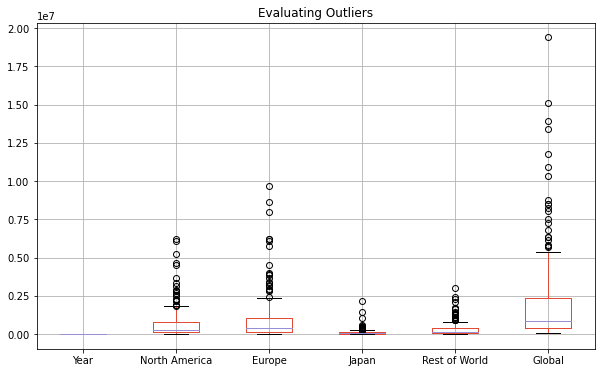

In [16]:
#Visualizing outliers using a boxplot
plt.figure(figsize=(10,6))
plt.title('Evaluating Outliers')
plt.style.use('ggplot')
ps4.boxplot()

In [17]:
#Evaluating quartiles

ps4.quantile([0,0.25,0.5,0.75,1])

,Year,North America,Europe,Japan,Rest of World,Global
0.00,2013.0,20000.0,10000.0,10000.0,10000.0,70000.0
0.25,2015.0,110000.0,120000.0,30000.0,50000.0,360000.0
0.50,2016.0,290000.0,410000.0,60000.0,130000.0,875000.0
0.75,2017.0,790000.0,1040000.0,122500.0,372500.0,2372500.0
1.00,2018.0,6180000.0,9710000.0,2170000.0,3020000.0,19390000.0


## Evaluating Interquartile Range

In [18]:
#North America

North_America_IQR=ps4['North America'].quantile(0.75)-ps4['North America'].quantile(0.25)

#Europe

Europe_IQR=ps4['Europe'].quantile(0.75)-ps4['Europe'].quantile(0.25)

#Japan

Japan_IQR=ps4['Japan'].quantile(0.75)-ps4['Japan'].quantile(0.25)

#Rest of World

Rest_of_World_IQR=ps4['Rest of World'].quantile(0.75)-ps4['Rest of World'].quantile(0.25)

#Globally

Global_IQR=ps4['Global'].quantile(0.75)-ps4['Global'].quantile(0.25)


## Evaluating Upper Outliers 

In [19]:
#North America

North_America_Upper = ps4['North America'].quantile(0.75)+1.5*North_America_IQR

#Europe

Europe_Upper = ps4['Europe'].quantile(0.75)+1.5*Europe_IQR

#Japan

Japan_Upper = ps4['Japan'].quantile(0.75)+1.5*Japan_IQR

#Rest of World

Rest_of_World_Upper = ps4['Rest of World'].quantile(0.75)+1.5*Rest_of_World_IQR

#Globally

Global_Upper = ps4['Global'].quantile(0.75)+1.5*Global_IQR


## Evaluating Lower Outliers

In [20]:
#North America

North_America_Lower = ps4['North America'].quantile(0.25)-1.5*North_America_IQR

#Europe

Europe_Lower = ps4['Europe'].quantile(0.25)-1.5*Europe_IQR

#Japan

Japan_Lower = ps4['Japan'].quantile(0.25)-1.5*Japan_IQR

#Rest of World

Rest_of_World_Lower = ps4['Rest of World'].quantile(0.25)-1.5*Rest_of_World_IQR

#Globally

Global_Lower = ps4['Global'].quantile(0.25)-1.5*Global_IQR

## Generating and Removing Outliers

In [21]:
#North America Outliers

ps4 = ps4[~(ps4['North America']>North_America_Upper)|(ps4['North America']<North_America_Lower)]

#Europe Outliers

ps4 = ps4[~(ps4['Europe']>Europe_Upper)|(ps4['Europe']<Europe_Lower)]

#Japan Outliers

ps4 = ps4[~(ps4['Japan']>Japan_Upper)|(ps4['Japan']<Japan_Lower)]

#Rest of World

ps4 = ps4[~(ps4['Rest of World']>Rest_of_World_Upper)|(ps4['Rest of World']<Rest_of_World_Lower)]

#Globally

ps4 = ps4[~(ps4['Global']>Global_Upper)|(ps4['Global']<Global_Lower)]



In [22]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 26 to 251
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Game           210 non-null    object
 1   Year           210 non-null    int64 
 2   Genre          210 non-null    object
 3   Publisher      210 non-null    object
 4   North America  210 non-null    int64 
 5   Europe         210 non-null    int64 
 6   Japan          210 non-null    int64 
 7   Rest of World  210 non-null    int64 
 8   Global         210 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 16.4+ KB


<AxesSubplot:title={'center':'Evaluating Outliers'}>

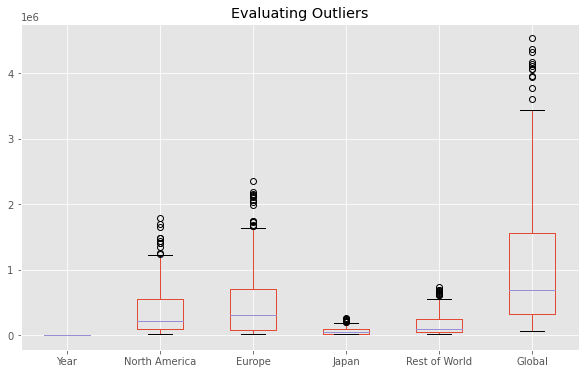

In [23]:
#Visualizing outliers using a boxplot again

plt.figure(figsize=(10,6))
plt.title('Evaluating Outliers')
plt.style.use('ggplot')
ps4.boxplot()

*=> The data seems just fine*

# Now, let's start Analyzing and Visualizing data

**First: Analyzing by Genre**

In [24]:
#Globally

Genre_data=ps4[['Genre','Global']].groupby('Genre').sum().sort_values('Global')
Genre_data

,Global
Genre,
Strategy,100000
MMO,960000
Simulation,2920000
Misc,4550000
Platform,7340000
Adventure,8830000
Fighting,11560000
Sports,13080000
Racing,21260000


Text(0.5, 1.0, 'PS4 Profit by Genre Globally')

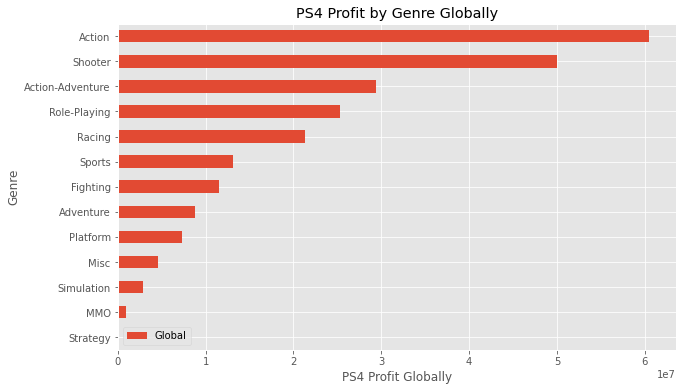

In [25]:
#visualizing Globally

Genre_data.plot(kind='barh', figsize=(10,6))
plt.xlabel('PS4 Profit Globally')
plt.title('PS4 Profit by Genre Globally')

In [26]:
#North America

Genre_North=ps4[['Genre','North America']].groupby('Genre').sum().sort_values('North America')
Genre_North


,North America
Genre,
Strategy,50000
MMO,400000
Simulation,850000
Misc,990000
Platform,2620000
Adventure,2740000
Sports,4200000
Racing,4640000
Fighting,4710000


Text(0.5, 1.0, 'North America PS4 Profit by Genre')

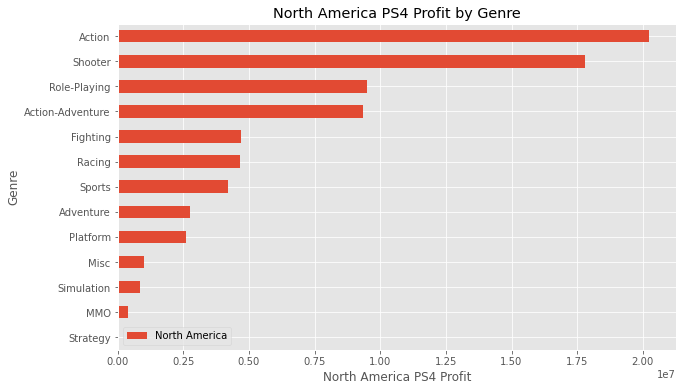

In [27]:
#visualizing North America

Genre_North.plot(kind='barh', figsize=(10,6))
plt.xlabel('North America PS4 Profit')
plt.title('North America PS4 Profit by Genre')

In [28]:
#Europe

Genre_Europe=ps4[['Genre','Europe']].groupby('Genre').sum().sort_values('Europe')
Genre_Europe

,Europe
Genre,
Strategy,30000
MMO,290000
Simulation,1490000
Misc,2630000
Platform,3380000
Fighting,3920000
Adventure,3960000
Sports,5960000
Role-Playing,8970000


Text(0.5, 1.0, 'Europe PS4 Profit by Genre')

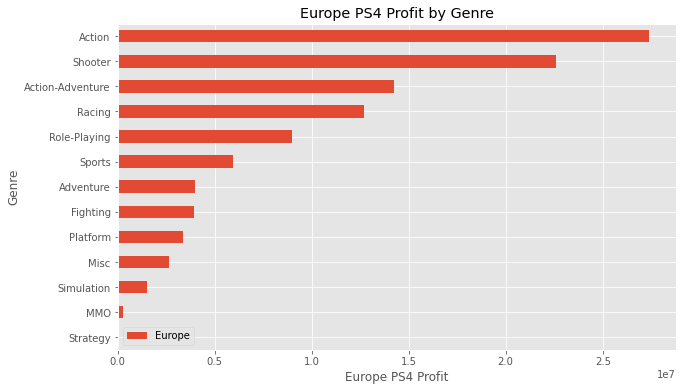

In [29]:
#visualizing Europe

Genre_Europe.plot(kind='barh', figsize=(10,6))
plt.xlabel('Europe PS4 Profit')
plt.title('Europe PS4 Profit by Genre')

In [30]:
#Japan

Genre_Japan=ps4[['Genre','Japan']].groupby('Genre').sum().sort_values('Japan')
Genre_Japan

,Japan
Genre,
Strategy,10000
MMO,120000
Simulation,140000
Platform,160000
Misc,270000
Racing,710000
Adventure,830000
Sports,970000
Action-Adventure,1210000


Text(0.5, 1.0, 'Japan PS4 Profit by Genre')

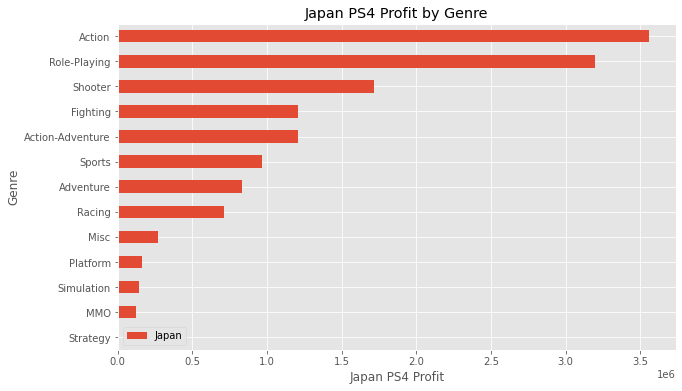

In [31]:
#visualizing Japan

Genre_Japan.plot(kind='barh', figsize=(10,6))
plt.xlabel('Japan PS4 Profit')
plt.title('Japan PS4 Profit by Genre')

In [32]:
#Rest of World

Genre_World=ps4[['Genre','Rest of World']].groupby('Genre').sum().sort_values('Rest of World')
Genre_World

,Rest of World
Genre,
Strategy,20000
MMO,140000
Simulation,450000
Misc,680000
Platform,1180000
Adventure,1290000
Fighting,1720000
Sports,1970000
Racing,3180000


Text(0.5, 1.0, 'Rest of World PS4 Profit by Genre')

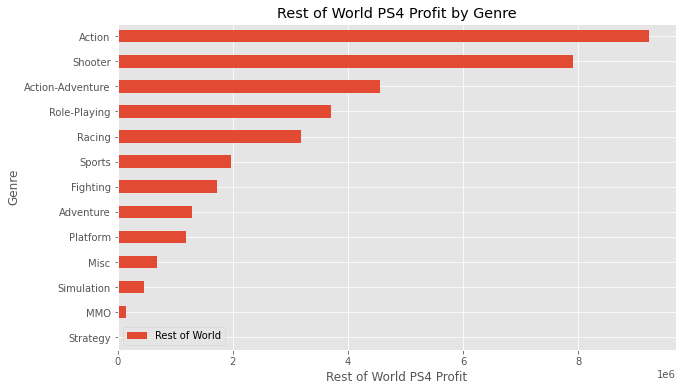

In [33]:
#visualizing Rest of World

Genre_World.plot(kind='barh', figsize=(10,6))
plt.xlabel('Rest of World PS4 Profit')
plt.title('Rest of World PS4 Profit by Genre')

**The top 5 genre are:**

    1-Action
    2-Shooter
    3-Action Adventure
    4-Role-Playing
    5-Racing

## Secondly, Analyzing by Year

In [34]:
#Globally

Year_Global=ps4[['Year','Global']].groupby('Year').sum()
Year_Global

,Global
Year,
2013,23370000
2014,49800000
2015,41280000
2016,56520000
2017,51530000
2018,13260000


Text(0.5, 1.0, 'Global PS4 Profit by Year')

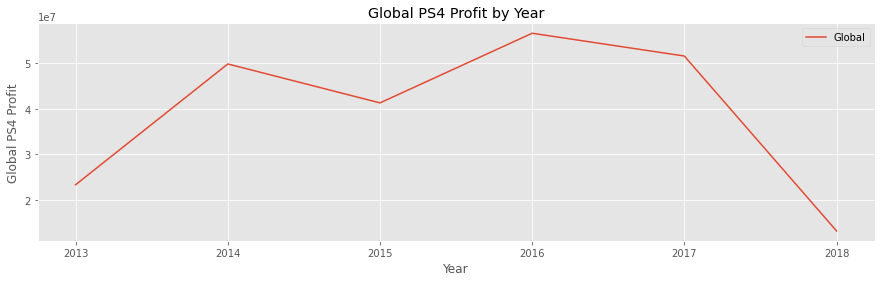

In [35]:
#visualizing Globally

Year_Global.plot(kind='line', figsize=(15,4))
plt.ylabel('Global PS4 Profit')
plt.title('Global PS4 Profit by Year')

In [36]:
#North America

Year_North_America =ps4[['Year','North America']].groupby('Year').sum()
Year_North_America 

,North America
Year,
2013,8020000
2014,16830000
2015,13670000
2016,17960000
2017,16660000
2018,4920000


Text(0.5, 1.0, 'North America PS4 Profit by Year')

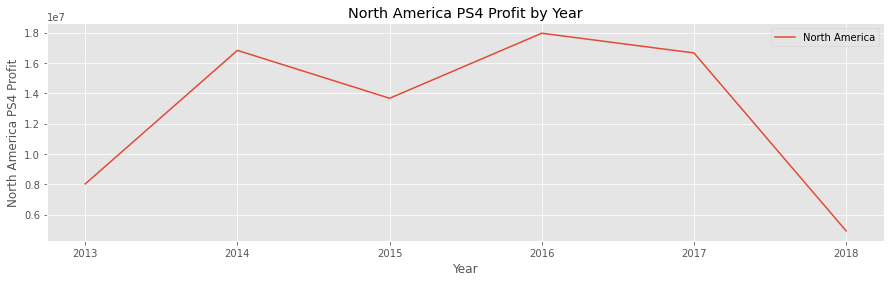

In [37]:
#visualizing North America

Year_North_America.plot(kind='line', figsize=(15,4))
plt.ylabel('North America PS4 Profit')
plt.title('North America PS4 Profit by Year')

In [38]:
#North Japan

Year_Japan =ps4[['Year','Japan']].groupby('Year').sum()
Year_Japan

,Japan
Year,
2013,550000
2014,1830000
2015,2870000
2016,3670000
2017,3900000
2018,1290000


Text(0.5, 1.0, 'Japan PS4 Profit by Year')

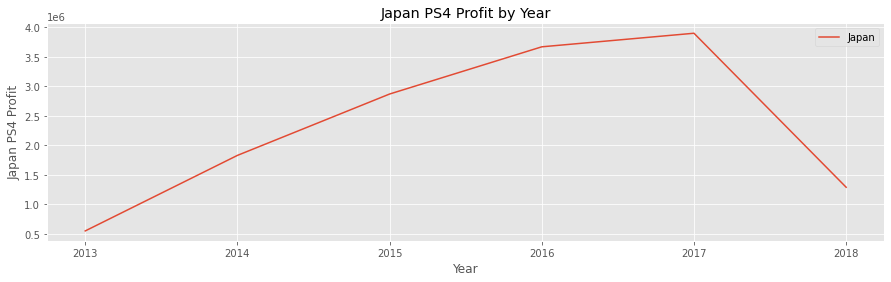

In [39]:
#visualizing Japan

Year_Japan.plot(kind='line', figsize=(15,4))
plt.ylabel('Japan PS4 Profit')
plt.title('Japan PS4 Profit by Year')

In [40]:
#Europe

Year_Europe =ps4[['Year','Europe']].groupby('Year').sum()
Year_Europe

,Europe
Year,
2013,11080000
2014,23320000
2015,18460000
2016,26340000
2017,23310000
2018,5050000


Text(0.5, 1.0, 'Europe PS4 Profit by Year')

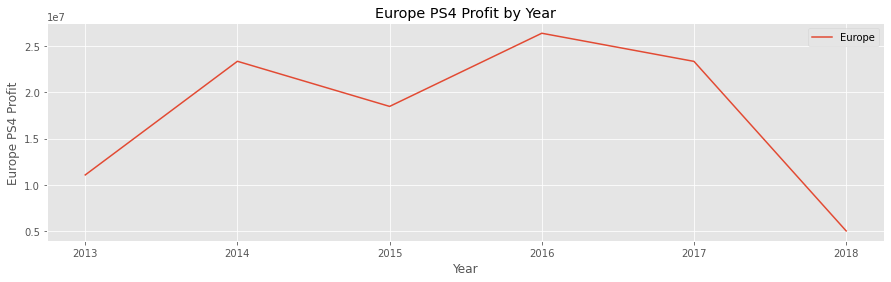

In [41]:
#visualizing Europe

Year_Europe.plot(kind='line', figsize=(15,4))
plt.ylabel('Europe PS4 Profit')
plt.title('Europe PS4 Profit by Year')

In [42]:
#Rest of World

Year_World =ps4[['Year','Rest of World']].groupby('Year').sum()
Year_World

,Rest of World
Year,
2013,3720000
2014,7800000
2015,6250000
2016,8550000
2017,7720000
2018,1990000


Text(0.5, 1.0, 'Rest of World PS4 Profit by Year')

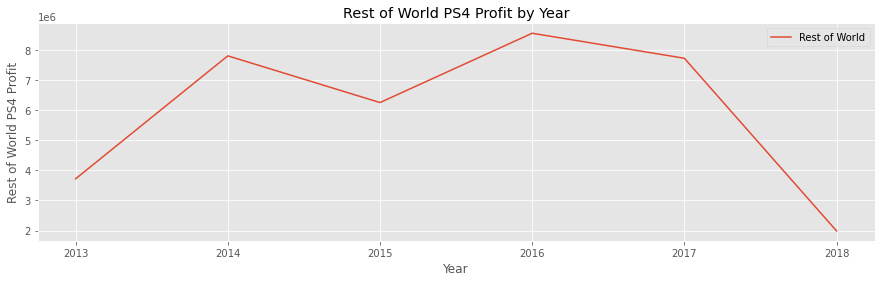

In [43]:
#visualizing Rest of World

Year_World.plot(kind='line', figsize=(15,4))
plt.ylabel('Rest of World PS4 Profit')
plt.title('Rest of World PS4 Profit by Year')

*=> It's clear that 2015 & 2016 have witnessed a spike in sales*

## Thirdly, Analyzing by Publisher

In [44]:
#Globally

Publisher_Global=ps4[['Publisher','Global']].groupby('Publisher').sum().sort_values('Global')
Publisher_Global.head()

,Global
Publisher,
Milestone S.r.l,160000
Koei Tecmo,220000
Milestone S.r.l.,240000
505 Games,340000
City Interactive,360000


Text(0.5, 1.0, 'Global PS4 Profit by Publisher')

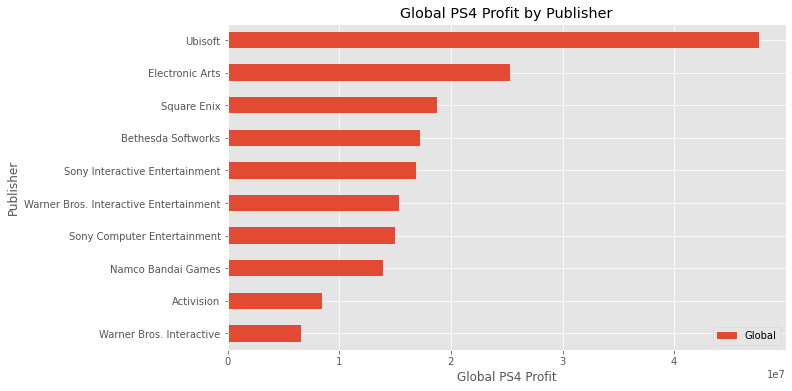

In [45]:
#visualizing Globally

Publisher_Global.tail(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Global PS4 Profit')
plt.title('Global PS4 Profit by Publisher')

In [46]:
#North America

Publisher_North=ps4[['Publisher','North America']].groupby('Publisher').sum().sort_values('North America')
Publisher_North.head()

,North America
Publisher,
Milestone S.r.l.,40000
Milestone S.r.l,70000
Koei Tecmo,90000
Telltale Games,120000
Kalypso Media,120000


Text(0.5, 1.0, 'North America Profit by Publisher')

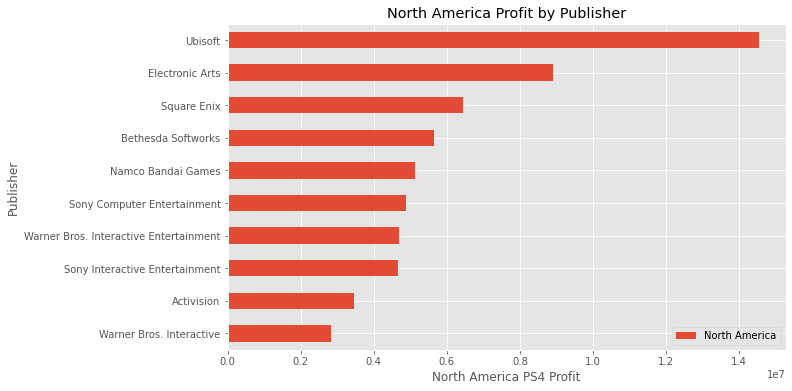

In [47]:
#visualizing North America

Publisher_North.tail(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('North America PS4 Profit')
plt.title('North America Profit by Publisher')

In [48]:
#Europe

Publisher_Europe=ps4[['Publisher','Europe']].groupby('Publisher').sum().sort_values('Europe')
Publisher_Europe.head()

,Europe
Publisher,
Koei Tecmo,40000
Milestone S.r.l,60000
PQube,90000
Gun Media,90000
505 Games,110000


Text(0.5, 1.0, 'Europe Profit by Publisher')

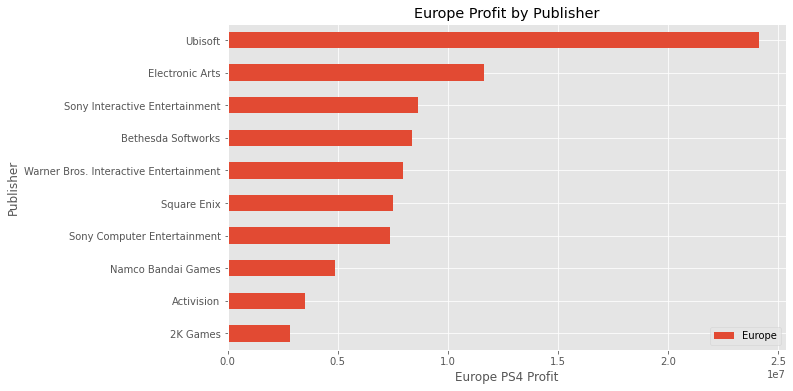

In [49]:
#visualizing Europe

Publisher_Europe.tail(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Europe PS4 Profit')
plt.title('Europe Profit by Publisher')

In [50]:
#Japan

Publisher_Japan=ps4[['Publisher','Japan']].groupby('Publisher').sum().sort_values('Japan')
Publisher_Japan.head()

,Japan
Publisher,
Milestone S.r.l,10000
2K Sports,20000
City Interactive,30000
Telltale Games,30000
Gun Media,30000


Text(0.5, 1.0, 'Japan Profit by Publisher')

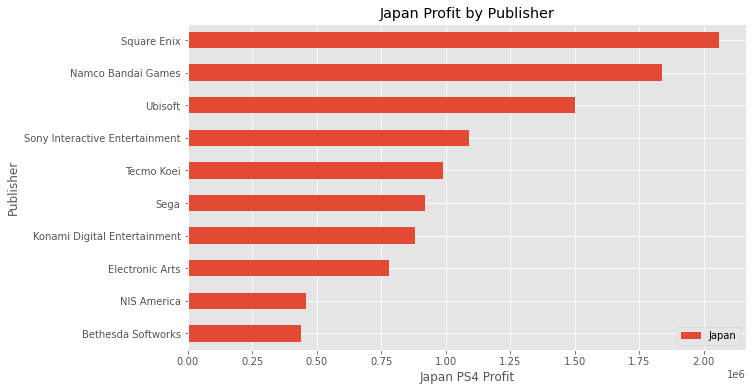

In [51]:
#visualizing Japan

Publisher_Japan.tail(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Japan PS4 Profit')
plt.title('Japan Profit by Publisher')

In [52]:
#Rest of World

Publisher_World=ps4[['Publisher','Rest of World']].groupby('Publisher').sum().sort_values('Rest of World')
Publisher_World.head()

,Rest of World
Publisher,
Milestone S.r.l.,30000
Milestone S.r.l,30000
Koei Tecmo,30000
505 Games,50000
PQube,60000


Text(0.5, 1.0, 'Rest of World Profit by Publisher')

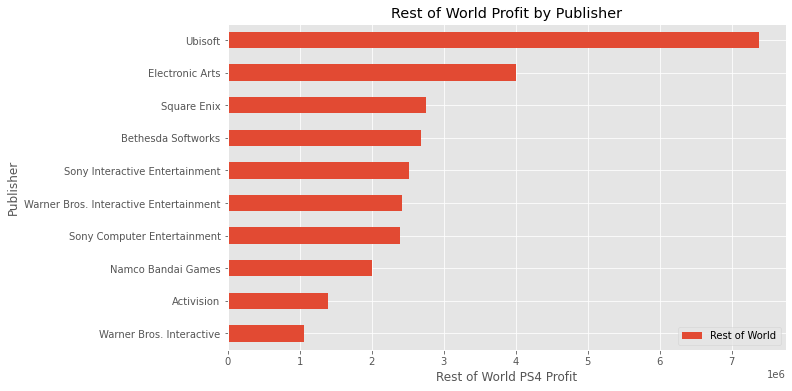

In [53]:
#visualizing Rest of World

Publisher_World.tail(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Rest of World PS4 Profit')
plt.title('Rest of World Profit by Publisher')

**=>Top 3 Publishers are:**
    
    1-Ubisoft
    2-Electronic Arts
    3-Square Enix

## Fourthly, Analyze by Game

In [54]:
#Global

Game_Global=ps4[['Game','Global']].groupby('Game').sum().sort_values('Global')
Game_Global.head()

,Global
Game,
God Wars: Future Past,70000
WRC 6,80000
Sudden Strike 4,100000
Natural Doctrine,100000
Guilty Gear Xrd REV 2,100000


Text(0.5, 1.0, 'Global Profit by Game')

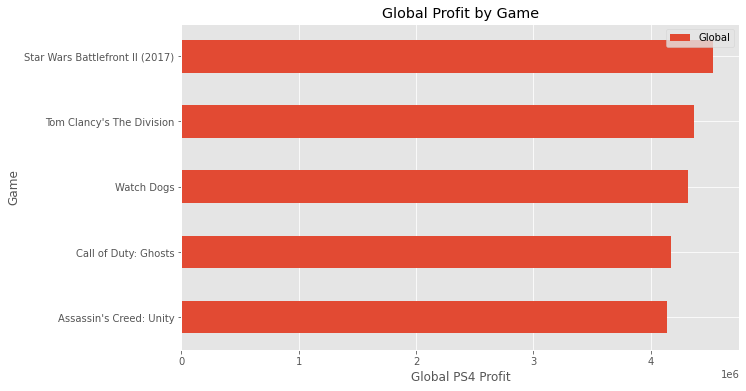

In [55]:
#visualizing Globally

Game_Global.tail(5).plot(kind='barh', figsize=(10,6))
plt.xlabel('Global PS4 Profit')
plt.title('Global Profit by Game')

In [56]:
#North America

Game_North=ps4[['Game','North America']].groupby('Game').sum().sort_values('North America')
Game_North.head()

,North America
Game,
Portal Knights,20000
Assassin's Creed Chronicles,20000
Gravity Rush Remastered,20000
The Witch and the Hundred Knight,30000
Arslan: The Warriors of Legend,30000


Text(0.5, 1.0, 'North America Profit by Game')

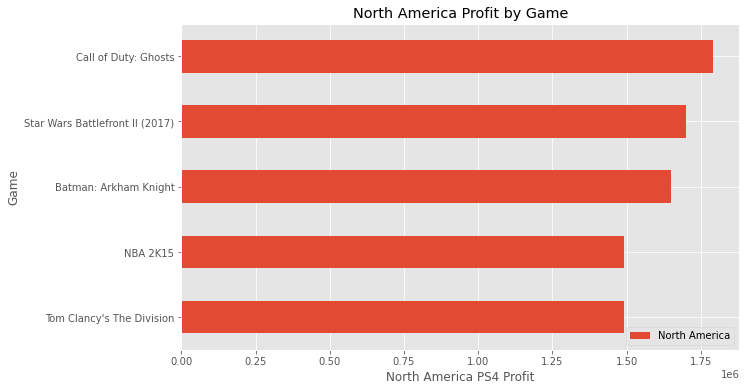

In [57]:
#visualizing North America

Game_North.tail(5).plot(kind='barh', figsize=(10,6))
plt.xlabel('North America PS4 Profit')
plt.title('North America Profit by Game')

In [58]:
#Europe

Game_Europe=ps4[['Game','Europe']].groupby('Game').sum().sort_values('Europe')
Game_Europe.head()

,Europe
Game,
The Witch and the Hundred Knight,10000
Guilty Gear Xrd REV 2,10000
God Wars: Future Past,10000
Samurai Warriors 4: Empires,10000
Berserk and the Band of the Hawk,20000


Text(0.5, 1.0, 'Europe Profit by Game')

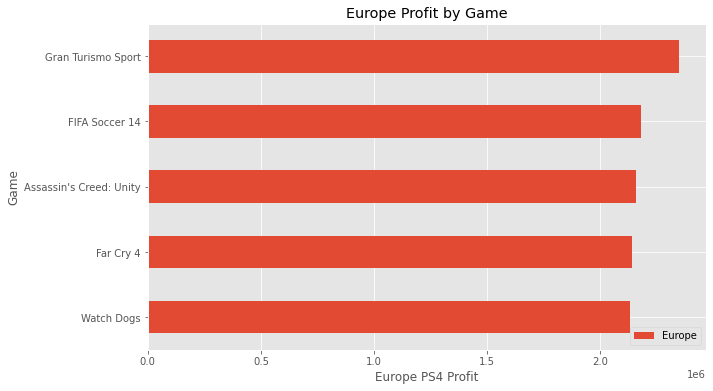

In [59]:
#visualizing Europe

Game_Europe.tail(5).plot(kind='barh', figsize=(10,6))
plt.xlabel('Europe PS4 Profit')
plt.title('Europe Profit by Game')

In [60]:
#Japan

Game_Japan=ps4[['Game','Japan']].groupby('Game').sum().sort_values('Japan')
Game_Japan.head()

,Japan
Game,
NBA 2K14,10000
LEGO Marvel's Avengers,10000
Lego Marvel Super Heroes,10000
The Elder Scrolls V: Skyrim PSVR,10000
Knack 2,10000


Text(0.5, 1.0, 'Japan Profit by Game')

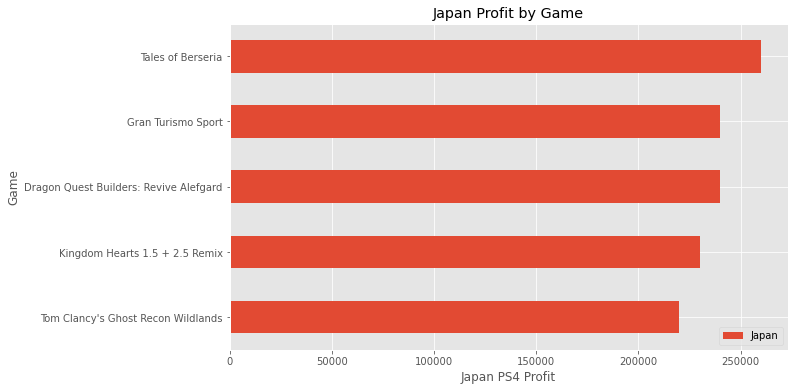

In [61]:
#visualizing Japan

Game_Japan.tail(5).plot(kind='barh', figsize=(10,6))
plt.xlabel('Japan PS4 Profit')
plt.title('Japan Profit by Game')

In [62]:
#Rest of World

Game_World=ps4[['Game','Rest of World']].groupby('Game').sum().sort_values('Rest of World')
Game_World.head()

,Rest of World
Game,
Natural Doctrine,10000
Guilty Gear Xrd REV 2,10000
Portal Knights,10000
God Wars: Future Past,10000
Samurai Warriors 4-II,10000


Text(0.5, 1.0, 'Rest of World Profit by Game')

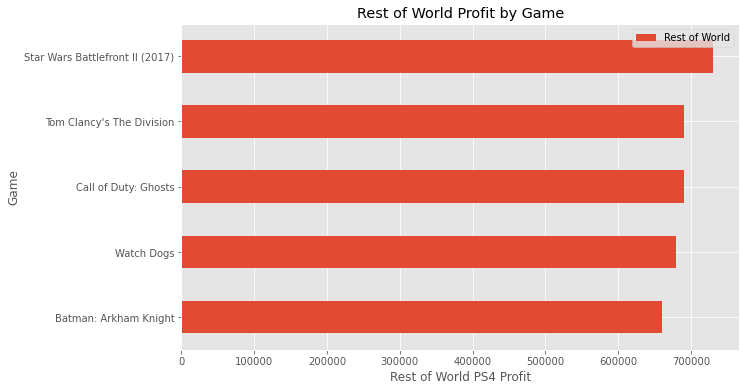

In [63]:
#visualizing Rest of World

Game_World.tail(5).plot(kind='barh', figsize=(10,6))
plt.xlabel('Rest of World PS4 Profit')
plt.title('Rest of World Profit by Game')

**=>Trending 5 Games are:**
    
    -Star Wars
    -Tom Clancy
    -Watch Dogs
    -Gran Turisma
    -Call of Duty
    -Batman

*Lastly, we shall investigate the correlation between profit and past years to evaluate PS4 performance and whether it's becoming popular or not.*

In [64]:
ps4[['Year','Global','North America','Japan','Rest of World']].corr()

,Year,Global,North America,Japan,Rest of World
Year,1.000000,-0.246243,-0.240903,0.115679,-0.256060
Global,-0.246243,1.000000,0.937542,0.280992,0.997801
North America,-0.240903,0.937542,1.000000,0.235396,0.952215
Japan,0.115679,0.280992,0.235396,1.000000,0.236044
Rest of World,-0.256060,0.997801,0.952215,0.236044,1.000000


In [65]:
#Evaluating Pearson coefficient and p-value

pearson_coef, p_value= stats.pearsonr(ps4['Year'],ps4['Global'])
pearson_coef, p_value

(-0.24624291334568205, 0.0003148874859086504)

In [ ]:
#plotting the relationship
plt.figure(figsize=(10,5))
plt.title('Correlation between Previous Years and Global Performance')
sns.regplot(x='Year', y='Global', data=ps4)

**It seems that the profit of PS4 from a global perspective has been being impacted negatively as years pass by. However, we need to put into consideration that pearsonr calculation says that this correlation is weak, and the p-value indicates that maybe this could be due to chance. In other words, the problem could be in the sample. We may need more data for further investigation**

In [ ]:
ps4.to_csv('PS4_PROJECT.CSV')

# Data Findings:

**=> The top 5 genre are:**

    1-Action
    2-Shooter
    3-Action Adventure
    4-Role-Playing
    5-Racing

**=> 2015 & 2016 have witnessed a spike in sales**

**=>Top 3 Publishers are:**

    1-Ubisoft
    2-Electronic Arts
    3-Square Enix
    
**=>Trending 5 Games are:**

    -Star Wars
    -Tom Clancy
    -Watch Dogs
    -Gran Turisma
    -Call of Duty
    -Batman